In [1]:
from astropy.io import fits
from heeps.pupil.create_petal import create_petal
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
cube = fits.getdata('/Users/cdelacroix/INSTRUMENTS/METIS/heeps_analysis/input_files/wavefront/cube_Cbasic_20201130_3600s_300ms_0piston_meters_scao_only_285.fits')
nframes, npupil = cube.shape[:2]
print('nframes=%s, npupil=%s'%(nframes, npupil))

nframes=12000, npupil=285


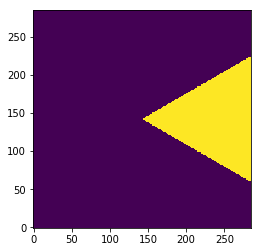

In [3]:
npetals = 6
petals = np.float32([create_petal(x, npetals, npupil) for x in range(npetals)])
imshow(petals[0], origin=True)


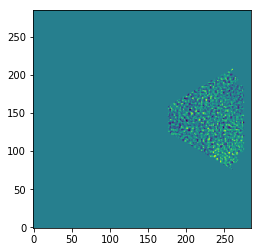

In [4]:
imshow(cube[0]*petals[0], origin=True)

## Calculate pistons in nm

In [5]:
pistons = np.empty((npetals, nframes))
for i, petal in enumerate(petals):
    print(i, end=', ')
    for j, frame in enumerate(cube):
        petal_frame = petal*frame
        mask = np.where(petal_frame != 0)[0]
        pistons[i,j] = np.mean(petal_frame[mask])*1e9
pistons.shape


0, 1, 2, 3, 4, 5, 

(6, 12000)

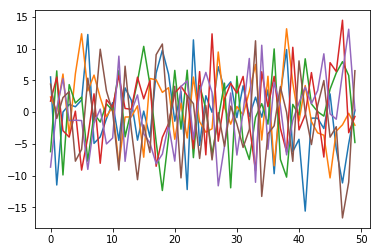

In [6]:
plot(pistons.T[:50])

In [7]:
np.mean(pistons, axis=1)

array([ 2.07916511, -2.06600551, -1.94255032,  2.12953446, -1.52823374,
       -1.80838259])

In [8]:
np.std(pistons, axis=1)

array([5.36439018, 5.63125259, 5.60897721, 5.36903633, 5.61856939,
       5.59058037])